In [1]:
import os
os.chdir('../')

In [2]:
from src import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
path_data = 'https://api.covid19india.org/csv/latest/state_wise.csv'

In [4]:
data = pd.read_csv(path_data)

In [5]:
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,21503828,17606841,234140,3653460,7/5/2021 14:05:09,9387,TT,18445,9271,66,NaN
1,Maharashtra,4942736,4227940,73515,639075,06/05/2021 21:41:09,2206,MH,0,0,0,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Kerala,1786397,1389515,5629,390906,06/05/2021 18:53:10,347,KL,0,0,0,Mahe native who expired in Kannur included in ...
3,Karnataka,1790104,1255797,17212,517075,06/05/2021 21:41:10,20,KA,0,0,0,NaN
4,Andhra Pradesh,1228186,1037411,8446,182329,06/05/2021 19:25:10,0,AP,0,0,0,NaN


In [6]:
data_state = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [7]:
data_time_series = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [8]:
data_time_series.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


In [9]:
data_time_series = data_time_series[data_time_series['Total Confirmed'] > 1000]

In [10]:
n = len(data_time_series)
feature = ['Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 'Total Recovered', 'Daily Deceased', 'Total Deceased']

for f in feature:
    ma_7day = []
    temp_data = list(data_time_series[f].values)
    temp_feature = f'7day MA {f}'
    temp_process = []
    for i in range(n):
        if len(ma_7day) == 7:
            summ = sum(ma_7day)
            temp_process.append(int(summ/7))
            
            ma_7day = ma_7day[1:]
            
        if len(ma_7day) < 7:
            
            ma_7day.append(temp_data[i])
            
    data_time_series[temp_feature] = [0]*7 + temp_process
    

In [11]:
data_time_series = data_time_series[data_time_series['7day MA Daily Confirmed'] > 0]
n = len(data_time_series)

In [12]:
data_time_series['7day MA total_active'] = data_time_series['Total Confirmed'] - data_time_series['7day MA Total Recovered'] - data_time_series['7day MA Total Deceased']
data_time_series['7day MA daily_active'] = data_time_series['Daily Confirmed'] - data_time_series['7day MA Daily Recovered'] - data_time_series['7day MA Daily Deceased']

data_time_series['percent_growth_active_case'] = data_time_series['7day MA daily_active']/data_time_series['7day MA total_active']

In [13]:
data_time_series['Date'] = data_time_series['Date_YMD'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

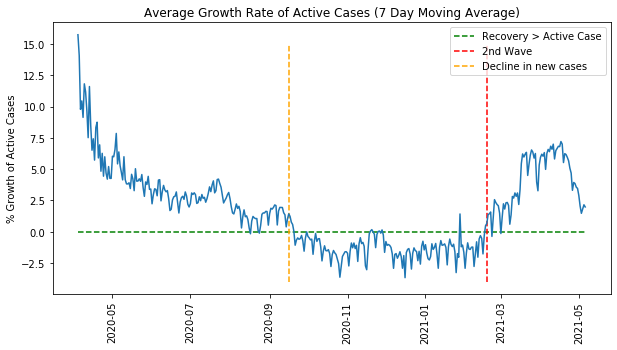

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.title('Average Growth Rate of Active Cases (7 Day Moving Average)')
plt.plot(data_time_series['Date'].values, 100*data_time_series['percent_growth_active_case'].values)

# ax.vlines([20, 100], 0, 1, linestyles='dashed', colors='red')
plt.hlines(0, xmin=data_time_series['Date'].values[0], 
           xmax= data_time_series['Date'].values[n-1],
           linestyles='dashed', 
           colors='Green', 
           label='Recovery > Active Case')

plt.vlines(x=data_time_series['Date'].values[320], 
           ymin=-4,
           ymax=15,
           colors='Red',
           linestyles='dashed',
           label='2nd Wave',)

plt.vlines(x=data_time_series['Date'].values[165], 
           ymin=-4,
           ymax=15,
           colors='Orange',
           linestyles='dashed',
           label='Decline in new cases',)


plt.ylabel('% Growth of Active Cases')
plt.xticks(rotation=90)
plt.legend()

In [15]:
data_time_series['Date'].values[165]

numpy.datetime64('2020-09-16T00:00:00.000000000')

In [16]:
import plotly.express as px

In [350]:
fig = px.line(y=100*data_time_series['percent_growth_active_case'].values, 
              x=data_time_series['Date'].values, 
              title='Average Growth Rate of Active Cases (7 Day Moving Average)',
              labels={'y': '% Growth Active Case',
                      'x': 'Time Period'},
              line_shape='spline')

fig.add_hline(y=0,
              line_width=1, 
              line_dash="dash", 
              line_color="Green",
              annotation_text="Recovery > Cases",
              annotation_position="bottom left",
             )


fig.add_vline(x='2020-09-16', 
              line_width=1,
              line_dash="dash", 
              line_color="Orange")


fig.add_vline(x='2021-02-18', 
              line_width=1,
              line_dash="dash", 
              line_color="Red",)
#               annotation_text="Recovery > Cases",
#               annotation_position="bottom left")

fig.update_layout(legend = dict(bgcolor= 'green'))
fig.show()

In [3]:
import config

In [4]:
import importlib
importlib.reload(config)

<module 'config' from '/home/manishsahu-xps/Downloads/tiler/streamlit_testing/streamlit-covid-dashboard/config.py'>

In [5]:
tzinfo = datetime.timezone(datetime.timedelta(hours=config.TIMEZONE_OFFSET))
current_date = datetime.datetime.now(tzinfo) - datetime.timedelta(1, minutes=0, hours=12)

In [6]:
from src import data_loader
import importlib
importlib.reload(data_loader)

<module 'src.data_loader' from '/home/manishsahu-xps/Downloads/tiler/streamlit_testing/streamlit-covid-dashboard/src/data_loader.py'>

In [27]:
## Loading Overall Dataset of cases, recoveries
data_time_series_cls = data_loader.DataCaseOverall(config.path_cases_overall_timeseries)
data_time_series_cls.preprocess()

In [30]:
data_tested_overall_cls = data_loader.DataTestOverall(config.path_test_overall_timeseries)
data_tested_overall_cls.preprocess()

2021-05-10 21:00:00.523 INFO    root: Number of NaNs removed in Overall Test Data on Tested As Of : 1


In [39]:
## Loading State wise Dataset of cases, reoveries
data_state_cls = data_loader.DataCaseState(config.path_cases_state_wise_timeseries)
data_state_cls.preprocess()

In [40]:
## Loading State wise Dataset of Corona Tests
data_tested_state_cls = data_loader.DataTestState(config.path_test_state_wise_timeseries)
data_tested_state_cls.preprocess()

2021-05-10 22:02:21.486 INFO    root: Number of NaNs in state wise testing on Updated on column: 0


In [48]:
data_state_cls.data[['State'] + columns]

,State,date,daily_confirmed,daily_test
377,Andaman and Nicobar Islands,2020-03-26 00:00:00+05:30,1,NaN
405,Andaman and Nicobar Islands,2020-03-27 00:00:00+05:30,5,NaN
433,Andaman and Nicobar Islands,2020-03-28 00:00:00+05:30,3,NaN
461,Andaman and Nicobar Islands,2020-03-29 00:00:00+05:30,0,NaN
489,Andaman and Nicobar Islands,2020-03-30 00:00:00+05:30,1,NaN
...,...,...,...,...
15097,West Bengal,2021-05-06 00:00:00+05:30,18431,60105.0
15134,West Bengal,2021-05-07 00:00:00+05:30,19216,64551.0
15171,West Bengal,2021-05-08 00:00:00+05:30,19436,63377.0
15208,West Bengal,2021-05-09 00:00:00+05:30,19441,63095.0


In [42]:
columns = ['date', 'daily_confirmed', 'daily_test']

data_positivity_state = pd.merge(data_state_cls.data, data_tested_state_cls.data, on=[
                           'date'], how='left')[columns]
data_positivity_state['positivity_rate'] = data_positivity_state['daily_confirmed']/data_positivity_state['daily_test']


KeyError: "['daily_test'] not in index"

In [12]:
# df_merge = pd.merge(data_time_series_cls.data, data_tested_overall_cls.data, on=['date_str'], how='left')
# df_merge = df_merge.fillna(0)

In [13]:
# path_vaccine_state_wise_cowin = 'http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv'

In [14]:
area = 'India'

In [15]:
data_vaccine_cls = data_loader.DataVaccineState(config.path_vaccine_state_wise_cowin)
data_vaccine_cls.process()

2021-05-10 10:19:18.471 INFO    numexpr.utils: NumExpr defaulting to 8 threads.
2021-05-10 10:19:18.476 INFO    root: Number of NaNs removed in Overall Vaccine Data on Tested As Of : 0


In [16]:
# Loading Full india or State wise
data_vaccine = data_vaccine_cls.data[(data_vaccine_cls.data['State'] == area) & (data_vaccine_cls.data['date'] <= current_date)]

### Vaccine Analysis
1. Male vs Female vs Thrid Gender
2. First Dose vs Second Dose
    a. Overall
    b. State Wise
3. Number of Doses
    a. Overall
    b. State Wise
  
4. Covaccine vs CovidShield
5. Age vs Distribution
    a. Overall
    b. State Wise
6. Number of Sites State Wise